In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

In [2]:
def smooth_data(data, width):
    smoothed = []
    for ii in range(len(data) - width):
        smoothed.append(np.sum(data[ii: ii+width]) / width)
    return smoothed

def load_train_history(file_dir):
    file_names = os.listdir(file_dir)
    file_names = [file_name for file_name in file_names if file_name.startswith('epoch_')]
    csv_names = [file_name for file_name in file_names if file_name.endswith('.csv')]
    csv_names = sorted(csv_names, key=lambda x: int(x.split('_')[-1].strip('.csv')), reverse=False)
    
    full_df = None

    for csv_name in csv_names:
        file_path = os.path.join(file_dir, csv_name)
        df = pd.read_csv(file_path)
        full_df = df if full_df is None else pd.concat([full_df, df])
        
    return full_df

In [3]:
# dir_list = [
#             'new_models/3-epochs/Unet_opw_16',
#             'new_models/3-epochs/Unet_opw_18']

dir_list = ['new_models/3-epochs/Unet_opw_20',
            'new_models/3-epochs/Unet_1210_opw_20',
            'new_models/3-epochs/Unet_1210_log_opw_20',
           #  'new_models/3-epochs/Unet_1210_deeper_opw_20',
           #  'new_models/3-epochs/Unet_1210_bigger_opw_20',
           # 'new_models/3-epochs/Unet_1211_opw_20',
           'new_models/3-epochs/Unet_1211_1_opw_20',]

# dir_list = ['models/unet_test5',
#            'models/unet_smaller_test',
#            'models/unet_1d_test']

In [9]:
file_dict = {}

for file_dir in dir_list:
    file_dict[file_dir] = load_train_history(file_dir)

In [14]:
file_dict[dir_list[1]]

,Unnamed: 0,loss,lr,tp,tn
0,0,6.033636,6.000000e-04,0.380682,0.498724
1,1,4.692406,6.000000e-04,0.152047,0.859108
2,2,4.753644,5.999999e-04,0.933702,0.073052
3,3,4.714453,5.999999e-04,0.058480,0.927389
4,4,4.462689,5.999998e-04,0.217877,0.772019
...,...,...,...,...,...
3493,3493,2.189450,4.838698e-10,0.757062,0.766267
3494,3494,2.190590,3.360207e-10,0.755814,0.743629
3495,3495,2.250949,2.150533e-10,0.736842,0.730159
3496,3496,2.217972,1.209675e-10,0.752747,0.757282


/tmp/ipykernel_1374/128679617.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  smoothed.append(np.sum(data[ii: ii+width]) / width)


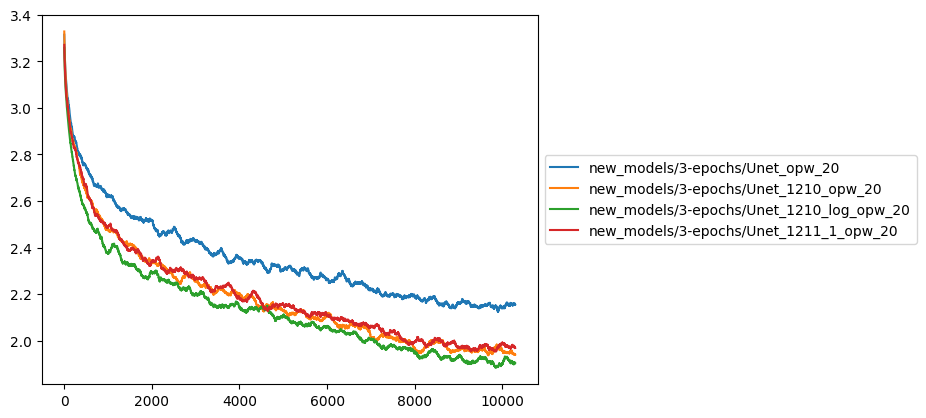

<Figure size 9600x4800 with 0 Axes>

In [12]:
window = 200

for file_dir, history in file_dict.items():
    if file_dir.split('/')[-1][0] == '.':
        print(file_dir)
        continue
    
    loss_record = history['loss']
    smoothed = smooth_data(loss_record, window)

    plt.plot(smoothed, label = file_dir.split('.')[-1])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim([1, 5])
# plt.xlim([100, 150])
plt.figure(figsize=(96, 48))
plt.show()

/tmp/ipykernel_375/128679617.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  smoothed.append(np.sum(data[ii: ii+width]) / width)


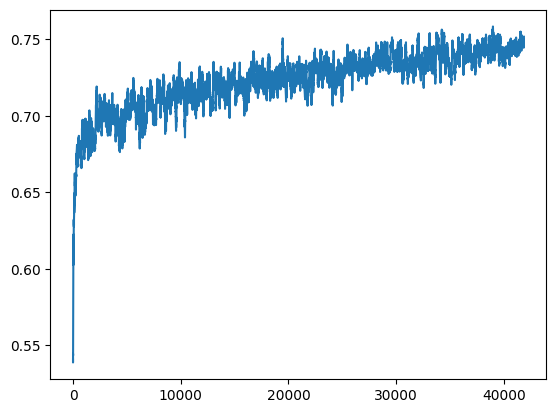

In [5]:
loss_record = load_train_history('new_models/3-epochs/Unet_opw_20_od_065')['fn']
smoothed = smooth_data(loss_record, 100)

plt.plot(smoothed)
plt.show()

In [12]:
load_train_history('models/unet_test3')

,Unnamed: 0,0
0,0,12.067044
1,1,6.335122
2,2,5.935755
3,3,6.702555
4,4,6.343550
...,...,...
37066,37066,2.812547
37067,37067,2.511343
37068,37068,2.593340
37069,37069,3.013650
